# Lab 6: Clustering

In this assignment, we will learn two clustering methods: K-means and  Agglomerative method.

Please first study the given example, which applies K-means and Agglomerative method to a toy dataset.

Based on this example, your task is to apply K-means and Agglomerative method to the heart disease dataset.


## 1. Example

### 1.1 Generate a toy dataset with two clusters

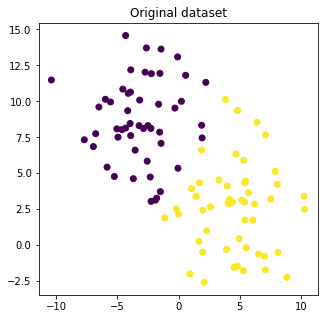

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets


# generate a toy dataset with two clusters
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3.0, random_state=42)
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original dataset')
plt.show()

### 1.2 Partition the dataset with K-means

Here, we use K-means method to partition this toy dataset. Then, to evaluate the clustering performance, we use two methods. The first one is to visualize the partitioned dataset.

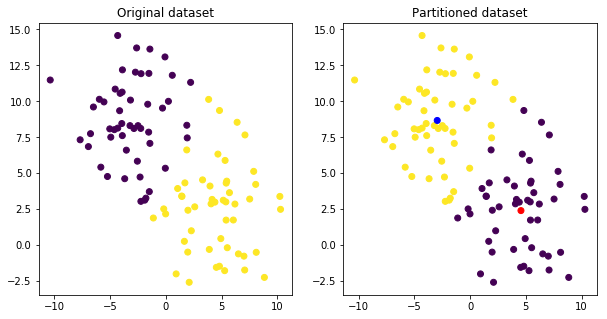

In [ ]:
cluster = KMeans(n_clusters=2, random_state=0).fit(X)

centroids = cluster.cluster_centers_  #get the clustering centroids

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original dataset')

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], c=['r', 'b'])  #visualize the clustering centroids
plt.title('Partitioned dataset')

plt.show()



The second method to evaluate the clustering performance is to use [normalized mutual information (NMI)](https://course.ccs.neu.edu/cs6140sp15/7_locality_cluster/Assignment-6/NMI.pdf)
The larger value indicates the better performance.


In [ ]:
from sklearn.metrics.cluster import normalized_mutual_info_score

nmi = normalized_mutual_info_score(cluster.labels_, y, average_method='arithmetic')
print('The normalized mutual information score of the K-means method is {:.4f}'.format(nmi))

The normalized mutual information score of the K-means method is 0.9291


### 1.3 Partition the dataset with Agglomerative method

Then, we use the Agglomerative method to partition the toy dataset.

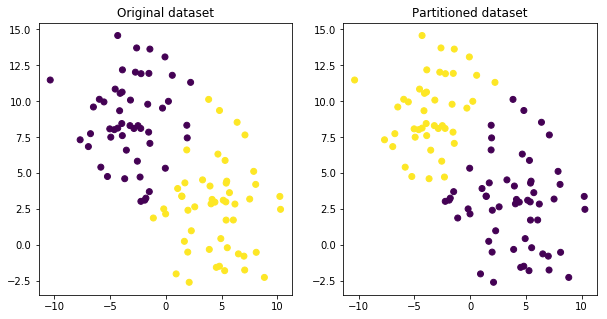

The normalized mutual information score of the Agglomerative method  is 0.6987


In [ ]:
cluster = AgglomerativeClustering(n_clusters=2).fit(X)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original dataset')

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_)
plt.title('Partitioned dataset')

plt.show()

nmi = normalized_mutual_info_score(cluster.labels_, y, average_method='arithmetic')
print('The normalized mutual information score of the Agglomerative method  is {:.4f}'.format(nmi))

## 2. Task

In this task, we still use the [heart disease](./heart.csv) dataset in Lab Assignment 5.
Each sample has the following feature:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


**The task is to partition all users into two groups with K-means and Agglomerative methods.**

### 2.1 Preprocess the raw data

* Check whether there are missing values
* Check whether theare are cateogrical features


In [1]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
uploaded = files.upload()

Mounted at /content/drive


Saving heart.csv to heart.csv


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('heart.csv')
print(df.isnull().sum())
print(df.dtypes)

# normalization
X,y = df.drop(columns=['target']).to_numpy(), df.target.to_numpy()

normalizer = StandardScaler()
X = normalizer.fit_transform(X)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object



* There are no missing values
* There are only numerical features; no categorical features
---


### 2.2 Partition the dataset with K-means and compute its NMI


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


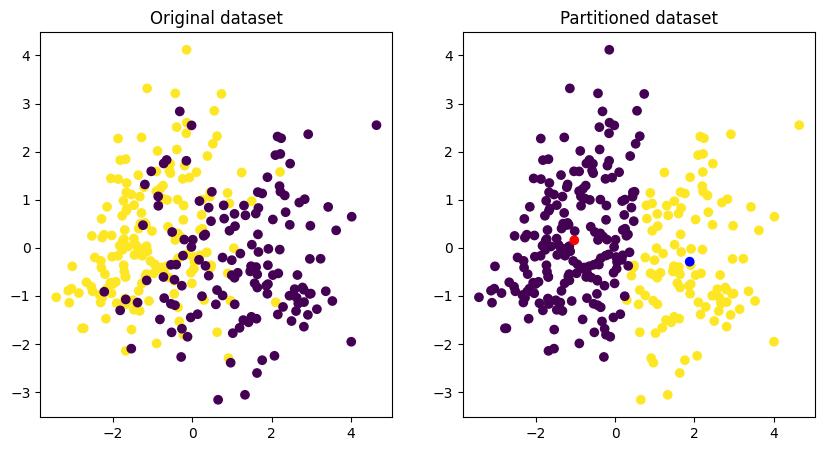

K-means normalized mutual information (NMI) score: 0.3043


In [5]:
# your code
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import normalized_mutual_info_score

# Reduce dimensionality to ndim = 2
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Partition the dataset using K-means
cluster = KMeans(n_clusters=2, random_state=0).fit(X_r)
centroids = cluster.cluster_centers_  #get the cluster centroids

# Visualization
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X_r[:, 0], X_r[:, 1], c = y)
plt.title('Original dataset')

plt.subplot(1,2,2)
plt.scatter(X_r[:, 0], X_r[:, 1], c = cluster.labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], c = ['r', 'b'])  #visualize the clustering centroids
plt.title('Partitioned dataset')

plt.show()

# Compute its NMI
nmi = normalized_mutual_info_score(cluster.labels_, df['target'], average_method='arithmetic')
print('K-means normalized mutual information (NMI) score: {:.4f}'.format(nmi))


### 2.3 Partition the dataset with Agglomerative method and compute its NMI


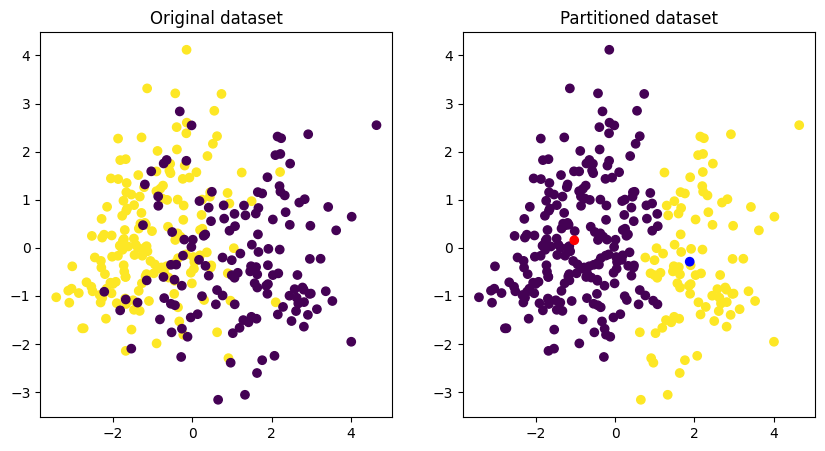

Agglomerative method normalized mutual information (NMI) score: 0.3064


In [6]:
# Partition the dataset with reduced dimensionality (ndim = 2)
cluster = AgglomerativeClustering(n_clusters=2).fit(X_r)

# Visualization
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X_r[:, 0], X_r[:, 1], c = y)
plt.title('Original dataset')

plt.subplot(1,2,2)
plt.scatter(X_r[:, 0], X_r[:, 1], c = cluster.labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], c = ['r', 'b'])  #visualize the clustering centroids
plt.title('Partitioned dataset')

plt.show()

# Compute its NMI
nmi = normalized_mutual_info_score(cluster.labels_, df['target'], average_method='arithmetic')
print('Agglomerative method normalized mutual information (NMI) score: {:.4f}'.format(nmi))

The agglomerative method performed better, with an NMI score of 0.3064, which is greater than the NMI for the K-means method (0.3043).